In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


# Find the index of the Ly parameter
def Ly_index(ydata):
    maxpos = ydata.index(max(ydata))
    return maxpos


# Find the Ly parameter
def Ly_value(ydata):
    return max(ydata)

    
# Find the alpha_i between 3 vectors
def angle_alpha_i(x1,x2,x3,y1,y2,y3):
    v1 = np.array([0, 1])
    v2 = np.array([x3-x2, y3-y2])
    xx1, yy1 = v1
    xx2, yy2 = v2
    
    inner_product = xx1*xx2 + yy1*yy2
    len1 = math.hypot(xx1, yy1)
    len2 = math.hypot(xx2, yy2)
    theta = math.acos(inner_product/(len1*len2))
    
    if (xx2<0) :
        theta*=-1
    
    return theta



# Find the winding angle for all datapoints
def winding_angle(xdata, ydata):
    n = len(xdata)
    angles = np.zeros(n-1)
    angles[0] = 0
    if (xdata[1]-xdata[0])!=0:
        angles[0] = math.pi/2 - math.atan((ydata[1]-ydata[0])/(np.abs(xdata[1]-xdata[0])))
        if (xdata[1]<0):
            angles[0] *= -1
        
    for ii in range (1, n-1):
        alpha_i = angle_alpha_i(xdata[ii-1], xdata[ii], xdata[ii+1],
                               ydata[ii-1], ydata[ii], ydata[ii+1])
        #angles[ii] = angles[ii-1] + alpha_i
        angles[ii] = alpha_i
    
    return angles
    


# Find the average of the squares of a vector
# <theta**2> 
def average_squares(vector):
    n = len(vector)
    suma = 0
    for ii in range (n):
        suma += (vector[ii]**2)
    return suma/(n)


# Trick to not simulate over and over
# Sebas dice que no sirve xd
def portion(cte, xdata, ydata):
    n = len(xdata)
    xdata = xdata[0: int(cte*n): 1]
    ydata = ydata[0: int(cte*n): 1]
    return xdata, ydata


#portion = 50000
#portion = 30


# Plot a given curve
def plot_curve(dataframe):
    plt.plot(dataframe["z_real"].to_numpy()[::], dataframe["z_imag"].to_numpy()[::])
    plt.show()

    
def plot_gaussian(dataframe):
    angles = winding_angle(dataframe["z_real"].to_numpy()[::], dataframe["z_imag"].to_numpy()[::])
    plt.hist(angles, density=True, bins=20)
    plt.show()


THETA2 = []
LY2 = []


def find_data(dataframe):
    angles = winding_angle(dataframe["z_real"].to_numpy()[::], dataframe["z_imag"].to_numpy()[::])
    THETA2.append(average_squares(angles)) 
    LY2.append(Ly_value(dataframe["z_imag"].to_numpy()))
    return angles


def portion_dataframe(dataframe, r):
    z_real = dataframe["z_real"].to_numpy()
    z_img  = dataframe["z_imag"].to_numpy()
    n = len(z_real)
    max_index = int(n*r)
    aux1 = z_real[:max_index:]
    aux2 = z_img[:max_index:]
    #new_data = np.array(aux1, aux2) 
    #print (new_data)
    df = pd.DataFrame({"z_real":aux1, "z_imag":aux2})
    return df

In [11]:
#portion_dataframe(T10, 0.1)

portion = []
#angles = np.array(10)
for ii in range (1, 10): 
    portion.append(portion_dataframe(T10, ii/10))
    #plot_curve(portion[ii/10])
    aux = find_data(portion[ii-1])


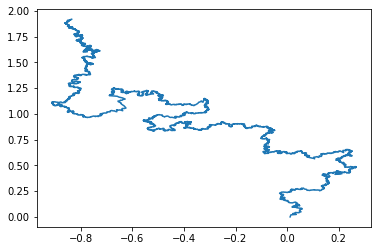

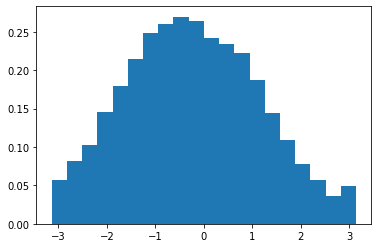

[ 0.15298984  1.36730366 -1.08407922 ...  2.0810269   0.3651825
  1.17624238]


In [3]:
T10 = pd.read_csv("Data_WA/final_curve_values_t= 1.0.csv")
T10
plot_curve(T10)
angles10 = find_data(T10)
plot_gaussian(T10)
print (angles10)

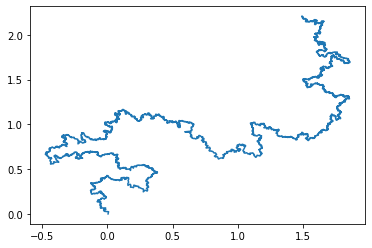

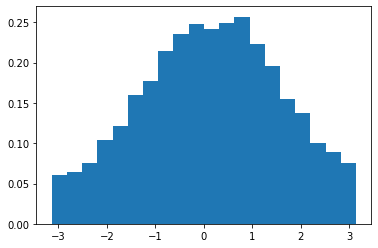

array([ 0.15689136, -1.4346745 , -0.61639301, ...,  1.30936336,
        1.36906918, -0.23110611])

In [3]:
T15 = pd.read_csv("Data_WA/final_curve_values_t= 1.5.csv")
T15
plot_curve(T15)
plot_gaussian(T15)
find_data(T15)

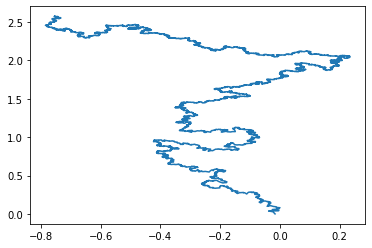

array([-0.23695803, -0.99295818,  1.49034969, ..., -1.54455468,
       -0.87381692, -0.87847062])

In [4]:
T20 = pd.read_csv("Data_WA/final_curve_values_t= 2.0.csv")
T20
plot_curve(T20)
find_data(T20)

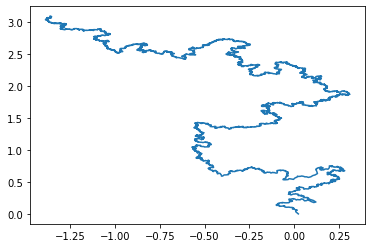

array([ 0.39702948,  0.02121503,  0.69687642, ..., -0.38909419,
        0.58059793,  0.7560269 ])

In [5]:
T30 = pd.read_csv("Data_WA/final_curve_values_t= 3.0.csv")
T30
plot_curve(T30)
find_data(T30)

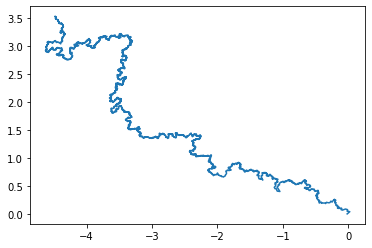

array([ 0.78546865, -1.36313813,  0.48312397, ..., -2.09894658,
       -2.69607098, -1.16972885])

In [6]:
T40 = pd.read_csv("Data_WA/final_curve_values_t= 4.0.csv")
T40
plot_curve(T40)
find_data(T40)

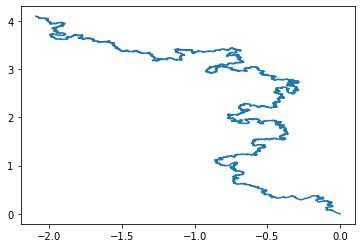

array([-0.73774755, -0.16073019, -1.19307108, ..., -2.61691249,
        3.06427239, -1.25149781])

In [7]:
T50 = pd.read_csv("Data_WA/final_curve_values_t= 5.0.csv")
T50
plot_curve(T50)
find_data(T50)

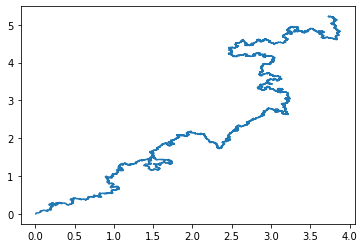

array([ 0.2043679 ,  1.44832764,  0.73292151, ..., -1.61908519,
       -1.25293722,  0.05802867])

In [8]:
T80 = pd.read_csv("Data_WA/final_curve_values_t= 8.0.csv")
T80
plot_curve(T80)
find_data(T80)

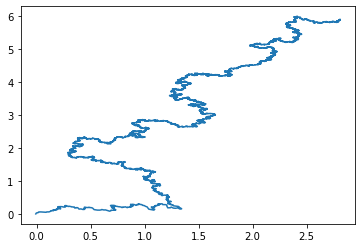

array([-0.18835183,  1.02341808,  0.36712006, ..., -1.33947855,
        1.15056338,  0.89182851])

In [9]:
T100 = pd.read_csv("Data_WA/final_curve_values_t= 10.0.csv")
T100
plot_curve(T100)
find_data(T100)

[0.6002994577725379, 0.8158750232252151, 0.9220477081289404, 1.138996258808963, 1.2341875348195026, 1.3160814688394245, 1.5345516118225877, 1.666358412129301, 1.8053014631296675]
[1.573711580953119, 1.820564562398705, 2.0644619166176614, 2.0580416323452435, 2.104038588999588, 2.1373439689142337, 2.0397806034808865, 2.0103325407047463, 1.9636512949574785]


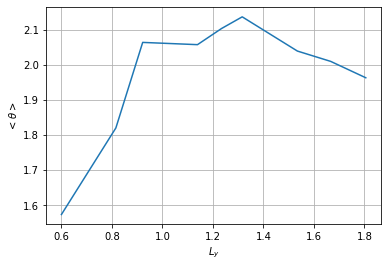

In [8]:
print (LY2)
print (THETA2)

plt.plot(LY2, THETA2)
plt.xlabel(r'$L_y$')
plt.ylabel(r'$<\theta>$')
#plt.xscale('log')
plt.grid()
plt.show()

In [ ]:
delta = 0.01
XX = [0, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta, 5]
YY = [0, 0+delta, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta]|

In [ ]:
XX = [0, 2, 3]
YY = [0, 1, 3]

In [ ]:
XX = [0, 0+delta, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta]
YY = [0, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta, 5]


In [ ]:
prueba_angles = winding_angle(XX, YY)
prueba_average_theta2 = average_squares(prueba_angles)
prueba_Ly = Ly_value(YY)
print (prueba_Ly, prueba_average_theta2)
print (prueba_angles)
plt.plot(XX, YY)
plt.grid()
plt.show()

plt.hist(prueba_angles)
plt.show()